<a href="https://colab.research.google.com/github/Alireza-Amani/Data_Assimilation/blob/master/Lorenz63.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sebastian Reich, Colin Cotter   
 **Probabilistic Forecasting and Bayesian Data Assimilation** 

# Lorenz Class

In [657]:
class Lorenz63():

  def __init__(self, T_0=0 , T=200, step=0.001, 
               sigma=10, ro=28, beta=8/3, 
               ini_state=[-0.587, -0.563, 16.870]):

    self.T_0 = T_0
    self.T = T
    self.step = step
    self.sigma = sigma
    self.ro = ro
    self.beta = beta
    self.ini_state = ini_state
    self.N = int((self.T - self.T_0)/self.step)

    self.f1 = lambda x, y: self.sigma * (y - x)
    self.f2 = lambda x, y, z: (x * (self.ro - z) ) - y
    self.f3 = lambda x, y, z: (x * y) - (self.beta * z)

    self.g = np.zeros((3, self.N))
    self.a = (np.sqrt(self.step))**-1
    self.g[0, 0] = self.a * (2**-0.5 - 0.5)
    self.g[1, 0] = self.a * (3**-0.5 - 0.5)
    self.g[2, 0] = self.a * (5**-0.5 - 0.5)

    self.g_1 = lambda g: (1.99999 * g) + (self.a/2)   # if g elem of [-a/2, 0)
    self.g_2 = lambda g: (-1.99999 * g) + (self.a/2)  # otherwise

    # creating the forcing  -- sort of like white noise, ok?!
    for j1 in range(self.N-1):

      self.g[:, j1+1] = (  ( (self.g[:, j1] < 0) * self.g_1(self.g[:, j1]) )   
      
                                  +  ( (self.g[:, j1] >= 0) * self.g_2(g[:, j1]) )

      )

    print("A new Lorenz63 is born\n")

  def about_me(self):
    info = "Hi, Lorenz at your service. \n"
    info += f"The simulation time starts from {self.T_0} and it ends at time {self.T}.\n"
    info += f"Temporal discretization step of simulation is {self.step}.\n"
    info += f"Simulation starts from x = {self.ini_state[0]}, y = {self.ini_state[0]}, z = {self.ini_state[0]}.\n"
    info += f"model parameters are sigma = {self.sigma}, ro = {self.ro}, and beta = {self.beta:.3}"
    print(info)


  
    
    
    

  def truth(self, start=None, end=None, every=1):

    if (start == None or end == None):
      start = self.T_0
      end = self.T
    
    x = np.zeros(self.N)
    x[0] = self.ini_state[0]

    y = np.zeros(self.N)
    y[0] = self.ini_state[1]

    z = np.zeros(self.N)
    z[0] = self.ini_state[2]

    r1 = int(start/self.step)
    r2 = int(end/self.step)
    for i1 in range(r1, r2-1):

      x[i1+1] = x[i1] + self.step * ( self.f1(x[i1], y[i1]) + self.g[0, i1])
      y[i1+1] = y[i1] + self.step * ( self.f2(x[i1], y[i1], z[i1]) + self.g[1, i1])
      z[i1+1] = z[i1] + self.step * ( self.f3(x[i1], y[i1], z[i1]) + self.g[2, i1])

    return x[r1:r2:every], y[r1:r2:every], z[r1:r2:every]


  def model(self, start=None, end=None, initials=[None], every=1):

    x_model = np.zeros(N)
    y_model = np.zeros(N)
    z_model = np.zeros(N)

    # initial conditions
    if initials[0] == None:

      x_model[0] = self.ini_state[0]
      y_model[0] = self.ini_state[1]
      z_model[0] = self.ini_state[2]
    else:
      x_model[0] = initials[0]
      y_model[0] = initials[1]
      z_model[0] = initials[2]


    if (start == None or end == None):
      start = self.T_0
      end = self.T
    r1 = int(start/self.step)
    r2 = int(end/self.step)
    for i1 in range(r1, r2-1):

      x_model[i1+1] = x_model[i1] + self.step * ( self.f1(x_model[i1], y_model[i1]) )
      y_model[i1+1] = y_model[i1] + self.step * ( self.f2(x_model[i1], y_model[i1], z_model[i1]) )
      z_model[i1+1] = z_model[i1] + self.step * ( self.f3(x_model[i1], y_model[i1], z_model[i1]) )

    return x_model[r1:r2:every], y_model[r1:r2:every], z_model[r1:r2:every]


  # def obser(self):
  #   '''
  #   only x
  #   '''


  def plot_model(self, start=None, end=None):

    if (start == None or end == None):
      start = self.T_0
      end = self.T


    x_model, y_model, z_model = Lorenz63.model(self, start, end)
    # model attractor 
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.plot3D(x_model, y_model, z_model, 'blue')
    ax.set_xlabel('x_model', fontsize=20)
    ax.set_zlabel('z_model')
    ax.set_ylabel('y_model')

    plt.show()   



  def plot_truth(self, start=None, end=None):

    

    if (start == None or end == None):
      start = self.T_0
      end = self.T

    x, y, z = Lorenz63.truth(self, start, end)

    
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.plot3D(x, y, z, 'blue')
    ax.set_xlabel('x', fontsize=20)
    ax.set_zlabel('z')
    ax.set_ylabel('y')

    plt.show()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [631]:
Lorenz63().model(every=50)[0].shape

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

A new Lorenz63 is born



(4000,)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

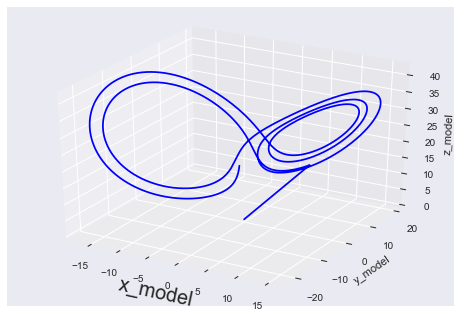

In [449]:
L.plot_model(0, 4)

In [595]:
lorenz.about_me()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Hi, Lorenz at your service. 
The simulation time starts from 0 and it ends at time 200.
Temporal discretization step of simulation is 0.05.
Simulation starts from x = -0.587, y = -0.587, z = -0.587.
model parameters are sigma = 10, ro = 28, and beta = 2.67


In [328]:
class a():
  def __init__(self):
    self.N = np.zeros(5)
    self.N[0] = 2
  def p(self):
    print(self.b)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [329]:
a().N

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

array([2., 0., 0., 0., 0.])

In [119]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import sklearn 
style.use('seaborn')
from mpl_toolkits import mplot3d
from plotly import graph_objects as go

#%cd /content/drive/My Drive/Colab Notebooks
%cd /Users/alireza_amani/Google Drive/Colab Notebooks
import font_output
font_output.increase_font()
font_output.font()

%xmode Verbose

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/Users/alireza_amani/Google Drive/Colab Notebooks


<IPython.core.display.Javascript object>

Exception reporting mode: Verbose


How about saving some of these objects/arrays with joblib?!

Nah! How bout making them functions , or class ?!! 


lass lorenz() ?

- truth 
- imperfect model 
- observation of x

# Lorenz 63 model

### Surrogate physical system (truth)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

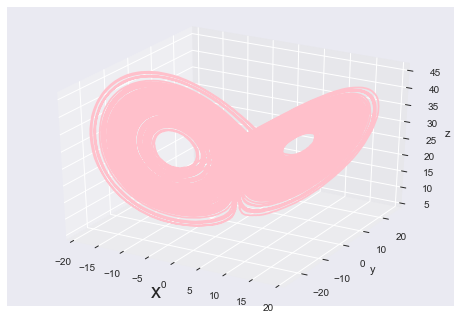

In [620]:

t_s = 0.001
T = 200 # t = [0, T]
N = len(np.arange(0, T, t_s)) # number of iterations

x = np.zeros(N)
y = np.zeros(N)
z = np.zeros(N)

# parameters
sigma = 10
ro = 28
beta = 8/3

# initial conditions
x[0] = -0.587
y[0] = -0.563
z[0] = 16.870

# vector field
f = np.zeros(shape=(3, N))
f1 = lambda x, y: sigma * (y - x)
f2 = lambda x, y, z: (x * (ro - z) ) - y
f3 = lambda x, y, z: (x * y) - (beta * z)


 # forcing term
g = np.zeros((3, N))

a = (np.sqrt(t_s))**-1
g[0, 0] = a * (2**-0.5 - 0.5)
g[1, 0] = a * (3**-0.5 - 0.5)
g[2, 0] = a * (5**-0.5 - 0.5)

g_1 = lambda g: (1.99999 * g) + (a/2)   # if g elem of [-a/2, 0)
g_2 = lambda g: (-1.99999 * g) + (a/2)  # otherwise

# creating the forcing  -- sort of like white noise, ok?!
for j1 in range(N-1):

  g[:, j1+1] = (  ( (g[:, j1] < 0) * g_1(g[:, j1]) )   
  
                              +  ( (g[:, j1] >= 0) * g_2(g[:, j1]) )

  )

  # Euler forward scheme 
for i1 in range(N-1):

  x[i1+1] = x[i1] + t_s * ( f1(x[i1], y[i1]) + g[0, i1])
  y[i1+1] = y[i1] + t_s * ( f2(x[i1], y[i1], z[i1]) + g[1, i1])
  z[i1+1] = z[i1] + t_s * ( f3(x[i1], y[i1], z[i1]) + g[2, i1])


# model attractor 
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot3D(x, y, z,  c='pink')
ax.set_xlabel('x', fontsize=20)
ax.set_zlabel('z')
ax.set_ylabel('y')

plt.show()

In [457]:
color = list(np.random.choice(range(256), size=3))
color

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[227, 85, 211]

## Model 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

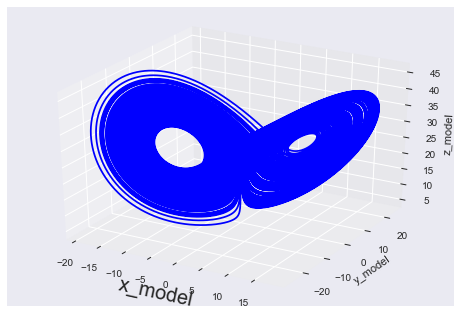

In [169]:
t_s = 0.001
T = 200 # t = [0, T]
N = len(np.arange(0, T, t_s)) # number of iterations

x_model = np.zeros(N)
y_model = np.zeros(N)
z_model = np.zeros(N)

# parameters
sigma = 10
ro = 28
beta = 8/3

# initial conditions
x_model[0] = -0.587



y_model[0] = -0.563
z_model[0] = 16.870

# vector field
f = np.zeros(shape=(3, N))
f1 = lambda x, y: sigma * (y - x)
f2 = lambda x, y, z: (x * (ro - z) ) - y
f3 = lambda x, y, z: (x * y) - (beta * z)


for i1 in range(N-1):

  x_model[i1+1] = x_model[i1] + t_s * ( f1(x_model[i1], y_model[i1]) )
  y_model[i1+1] = y_model[i1] + t_s * ( f2(x_model[i1], y_model[i1], z_model[i1]) )
  z_model[i1+1] = z_model[i1] + t_s * ( f3(x_model[i1], y_model[i1], z_model[i1]) )


# model attractor 
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot3D(x_model, y_model, z_model, 'blue')
ax.set_xlabel('x_model', fontsize=20)
ax.set_zlabel('z_model')
ax.set_ylabel('y_model')

plt.show()




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<function <lambda> at 0x7fb0b92e2d40>


## Model vs Truth

In [0]:
mse(x[4000:6000], x_model[4000:6000])

<IPython.core.display.Javascript object>

103.3354951199867

In [0]:
mse(x[2000:4000], x_model[2000:4000])

<IPython.core.display.Javascript object>

2.651336413799213

In [0]:
mse(x[:2000], x_model[:2000])

<IPython.core.display.Javascript object>

0.3789304526475418

<IPython.core.display.Javascript object>

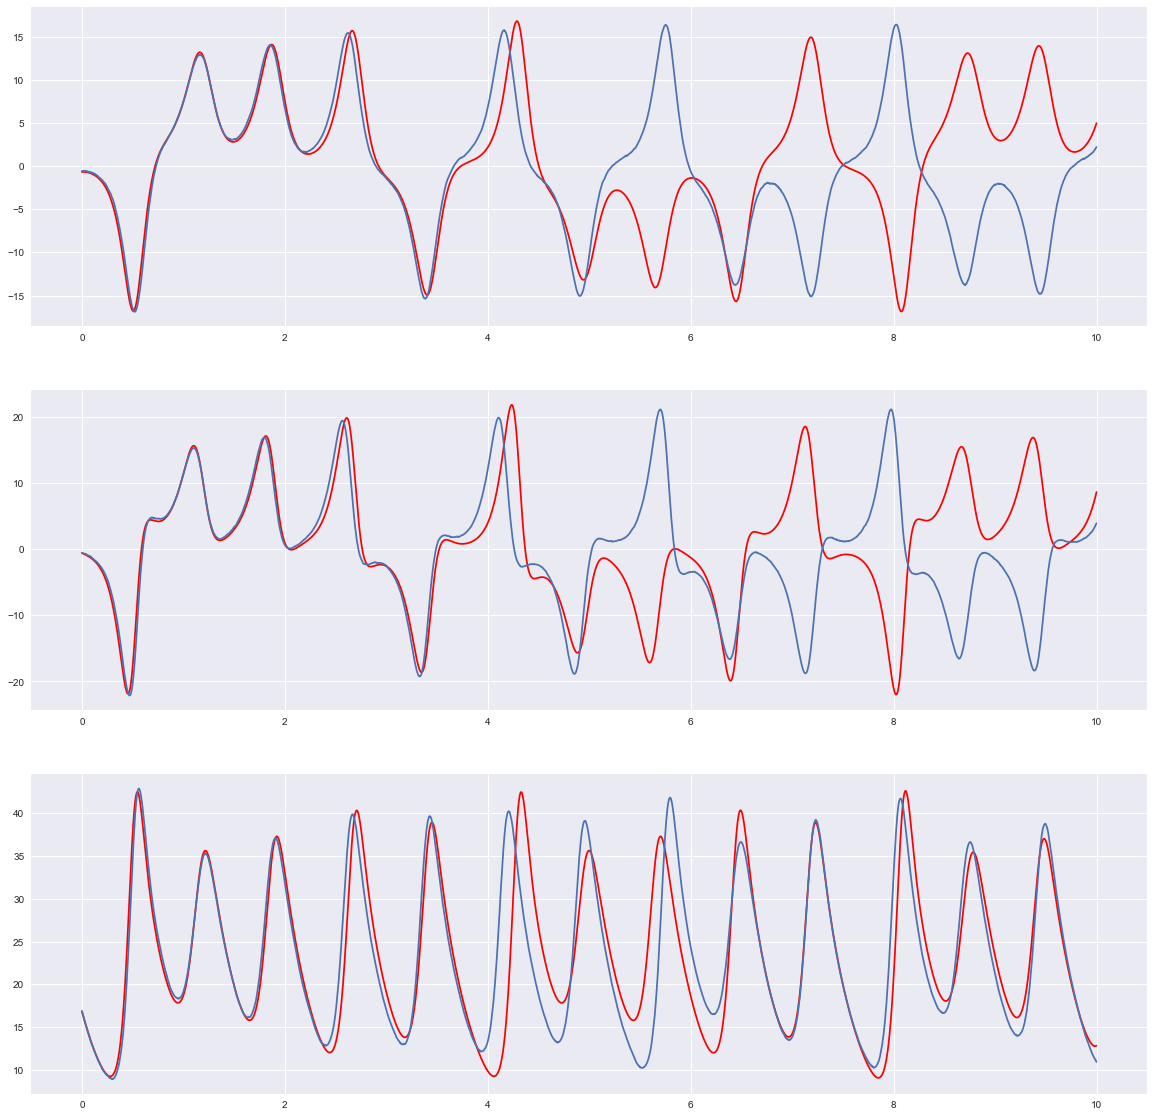

In [0]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(20, 20))


t = np.arange(0, 10, t_s)

s = len(t)

ax[0].plot(t, x_model[:s], color='r')
ax[0].plot(t, x[:s])

ax[1].plot(t, y_model[:s], color='r')
ax[1].plot(t, y[:s])

ax[2].plot(t, z_model[:s], color='r')
ax[2].plot(t, z[:s])

plt.show()


## Measurement Procedure

In [167]:
x

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

3

In [170]:
ts_obs = 0.05
n_obs = int(T/ts_obs)


a1 = 4
eps_0 = a1 * (2**-0.5 - 0.5)
eps_1 = lambda epsilon: (1.99999 * epsilon) + a1/2
eps_2 = lambda epsilon: (-1.99999 * epsilon) + a1/2

eps = np.zeros(n_obs * 200)
eps[0] = eps_0
for j2 in range(n_obs * 200 - 1):
  eps[j2+1] = ( ((eps[j2] < 0) * eps_1(eps[j2])) +
                ((eps[j2] >= 0) * eps_2(eps[j2]))
      
  )




xi = np.zeros(int(n_obs * 20))
for j3 in range(int(xi.size) ):
  xi[j3] = eps[10*j3]



obs_error = np.zeros(n_obs)
obs_er_nan = np.full(N, np.nan)

for j4 in range(n_obs):
  obs_error[j4] = 1/20 * (np.sum(xi[(j4)*20 : 20*(j4+1)]))
  obs_er_nan[50*j4] = obs_error[j4]

obs_nan = np.full(N, np.nan)
obs_plus = np.full(N, x)
x_obs = np.zeros(n_obs)

for j5 in range(n_obs):
  x_obs[j5] = x[50*j5] + obs_error[j5]
  obs_nan[j5*50] = x_obs[j5]
  obs_plus[50*j5] = x_obs[j5] 



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

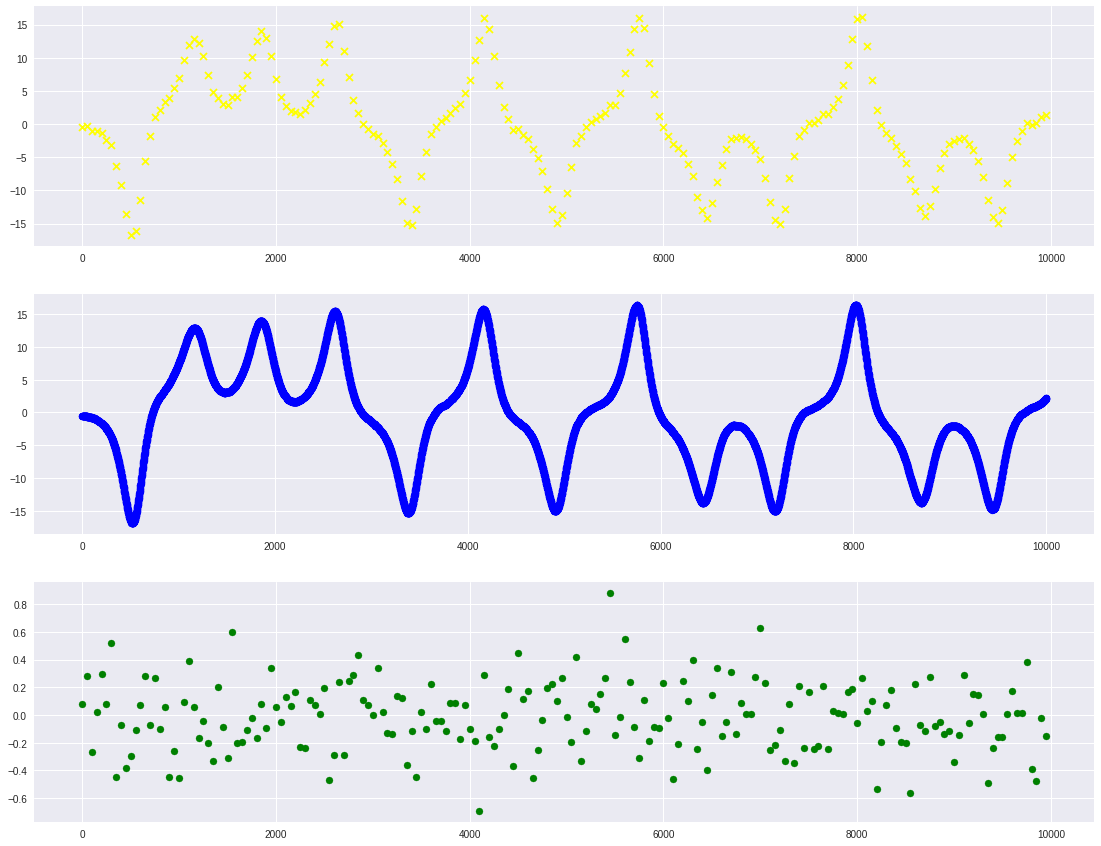

In [0]:
t = int(10/t_s)
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(19, 15))
ax[0].scatter(list(range(t)), obs_nan[:t], c='yellow', marker='x')
ax[1].scatter(list(range(t)), x[:t], c='blue')
ax[2].scatter(list(range(t)), obs_er_nan[:t], c='green')

plt.show()

## Data-Drive Forecasting

### AR(1)

$$ y_{predict}(t) = y_{obs}(t_{k^*}) + (t - t_{k^*}) \dfrac{y_{obs}(t_{k^*}) - y_{obs}(t_{k^* + 1})}{\Delta t}        $$

In [0]:
delta_t = 0.05
step = 0.05
st = int(step/delta_t)

AR1 = lambda y, y_1, step, delta_t: y + ( (step) * ((y - y_1) / delta_t) )

start = int(100/delta_t)
end = int(200/delta_t)


x_preds = np.full(n_obs, np.nan)

for t1 in range(start, end-1):
  x_preds[t1 + 1] = AR1(x_obs[t1], x_obs[t1 - 1], step, delta_t)

fig, ax = plt.subplots(figsize=(25, 9), constrained_layout=True)
fig.suptitle( t = "AR(1) vs observation", fontsize=20, fontweight='bold')


ax.scatter(range(start+1, 2100, st), x_preds[start+1:2100:st], marker='x', c='red')
ax.plot(range(start+1, 2100, st), x_preds[start+1:2100:st])

ax.scatter(range(start+1, 2100, st), x_obs[start+1:2100:st])
ax.plot(range(start+1, 2100, st), x_obs[start+1:2100:st])


plt.show()

from sklearn.metrics import mean_squared_error as mse
rmse = np.sqrt(mse(x_obs[start+1::st], x_preds[start+1::st]))
print(f"\nRMSE = {rmse :.4}\n")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NameError: ignored

### AR4

In [0]:
# AR(4)

delta_t = 0.05
step = 0.05
st = int(step/delta_t)

start = int(100/delta_t)
end = int(200/delta_t)


def AR4(X, y, xnew=None):
  '''
  X = [x0, x-1, x-2, x-3, x-4]
  y = [y0, y-1, y-2, y-3, y-4]
  '''
  A = np.zeros(shape=(5, 5))

  
  for row in range(5):
    A[row,:] = [1, X[row], X[row]**2, X[row]**3, X[row]**4]

  b = np.array(y).reshape(5, 1)

  if False: #np.linalg.det(A.T @ A) != 0:
    #coeff = np.linalg.inv(A.T @ A) @ (A.T @ b)
    pass
  else:
    coeff = np.linalg.inv(A) @ b

  y_pred = 0
  for i1 in range(5):
    y_pred += (coeff[i1] * xnew**i1)


  return y_pred



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

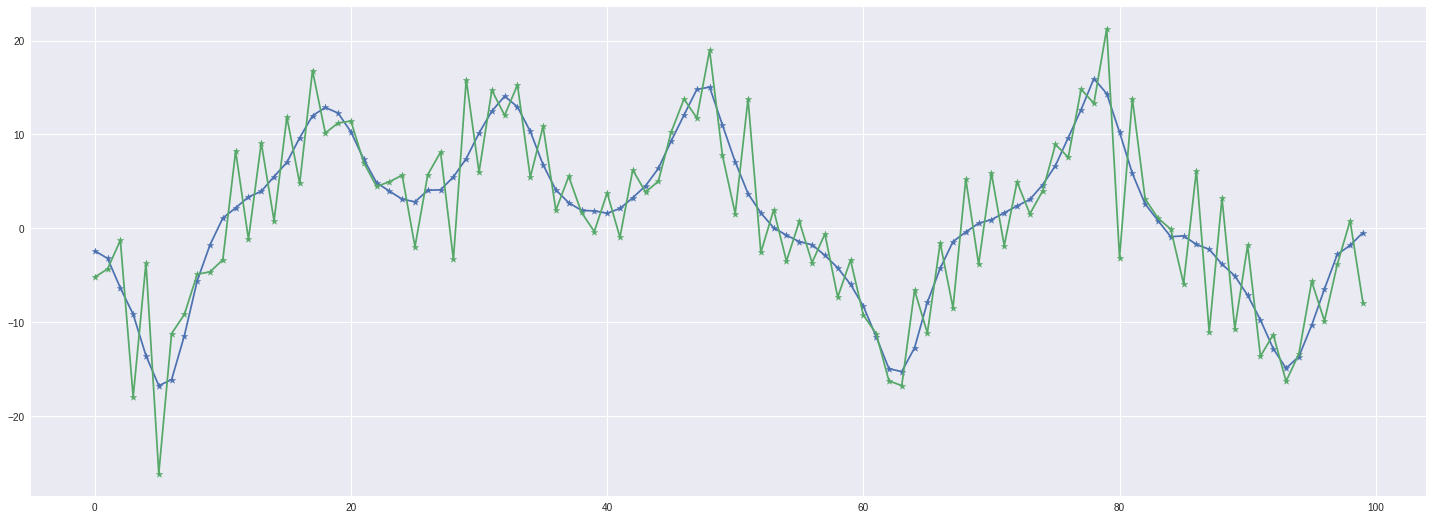

In [0]:
x_ar4 = np.zeros(n_obs)

for count, t1 in enumerate(np.round(np.arange(0.2, T-0.05 , 0.05), 2)):
  count += 4
  t1 = round(t1, 3)

  X=np.array([t1, t1-delta_t, t1-2*delta_t,
                          t1-3*delta_t, t1-4*delta_t])
  y=np.array([ x_obs[count], x_obs[count-1],
                          x_obs[count-2], x_obs[count-3],
                          x_obs[count-4]])


  x_ar4[count+1] = AR4(X, y
                       , xnew=np.round(a = t1+0.05, decimals=3))
  
fig, ax = plt.subplots(figsize=(25, 9))

ax.scatter(range(100), x_obs[5:105], marker='*')
ax.plot(range(100), x_obs[5:105])

ax.scatter(range(100), x_ar4[5:105], marker='*')
ax.plot(range(100), x_ar4[5:105])


plt.show()



In [0]:
np.sqrt(mse(x_obs[5:], x_ar4[5:]))

<IPython.core.display.Javascript object>

4.166643581409894

In [0]:
Xstar.value

<IPython.core.display.Javascript object>

array([[ 1.44159749e+05],
       [-2.47444949e+04],
       [-1.70759259e+03],
       [ 5.08928558e+02],
       [-2.34901950e+01]])

### Least-squares

In [0]:
# lsqr 

y_train = x_obs[:2005]
y_test = x_obs[2005:]




A = np.zeros(shape=(2000, 5))
Atest = np.zeros(shape=(1990, 5))
btrain = np.zeros((2000, 1))  
btest = np.zeros((1990, 1))  

for i1 in range(2000):

  A[i1,:] = [y_train[i1+4], y_train[i1+3], y_train[i1+2], y_train[i1+1], y_train[i1] ]

  btrain[i1, 0] = y_train[i1+5]

for i1 in range(1990):
  Atest[i1,:] = [y_test[i1+4], y_test[i1+3], y_test[i1+2], y_test[i1+1], y_test[i1] ]

  btest[i1, 0] = y_test[i1+5]

  

coeff = np.linalg.inv(A.T @ A) @ (A.T @ btrain)
coeff

y_preds = Atest @ coeff

np.sqrt(mse(y_test[5:], y_preds))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.9897092578236939

In [0]:
  Atest.shape

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(1990, 5)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.9897092578236939

In [0]:
xstar = cp.Variable((5, 1))
obj = cp.Minimize(cp.norm2((A @ xstar) - b.reshape(2000, 1)))
problem = cp.Problem(obj)

problem.solve(solver='MOSEK')
xstar.value

<IPython.core.display.Javascript object>

array([[-4.94839035e-01],
       [-2.20177563e-03],
       [ 1.80147397e-03],
       [-7.82831345e-06],
       [-1.30741209e-07]])

In [0]:
X[0], y[0]

<IPython.core.display.Javascript object>

(9.8, -0.11194300181504863)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

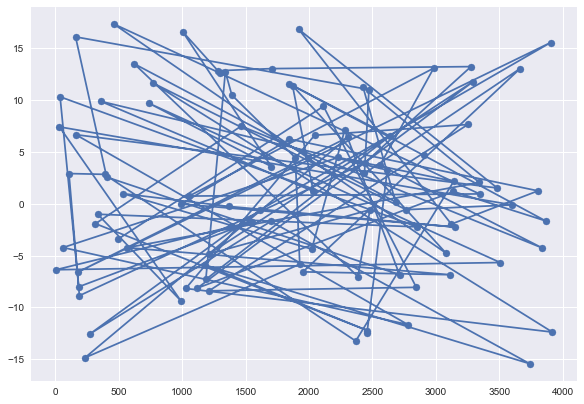

In [0]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split as tts 
from sklearn.metrics import mean_squared_error as mse

np.random.seed(1917)

Xobs = np.array(range(n_obs)).reshape(-1, 1)
yobs = x_obs



ind = int(n_obs/2)

X_train = Xobs[:ind]
X_test = Xobs[ind:]

y_train = x_obs[:ind]
y_test = x_obs[ind:]


X_train, X_test, y_train, y_test = tts(Xobs, yobs, test_size=0.2)


model = RandomForestRegressor(n_estimators=1000, n_jobs=-1)
model.fit(X_train, y_train)

rf_preds = model.predict(X_train)




fig, ax = plt.subplots(constrained_layout=True)
ax.scatter(Xobs[X_train[:100]], y_train[:100]);
ax.plot(X_train[:100], y_train[:100]);

#ax.scatter(X_train[:100], rf_preds[:100]);
#ax.plot(X_train[:100], rf_preds[:100]);


plt.show()

<IPython.core.display.Javascript object>

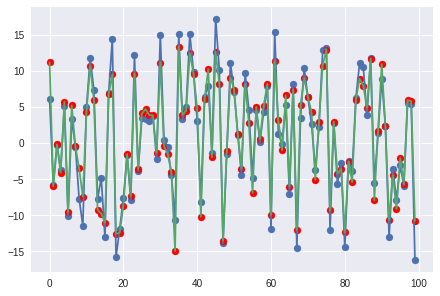

In [0]:
fig, ax = plt.subplots(constrained_layout=True)

xx = Xobs[X_test[:100]].flatten()
rf_preds = model.predict(X_test)

ax.scatter(range(100), yobs[xx]);
ax.plot(range(100), yobs[xx]);

ax.scatter(range(100), rf_preds[:100], c='red');
ax.plot(range(100), rf_preds[:100]);


plt.show()

In [0]:
model.score(X_train, y_train), model.score(X_test, y_test)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(0.9939258819850753, 0.9563442105816976)

# Variational DA

In [658]:
lorenz = Lorenz63()

  
def D_Zn(n, xmodel, ymodel, zmodel):

  
  jacob = np.zeros((3, 3), dtype='object')


  jacob[0, 0] = lambda x, y, z: -sigma * x
  jacob[0, 1] = lambda x, y, z: sigma * y
  jacob[0, 2]  = lambda x, y, z: 0 


  jacob[1, 0]  = lambda x, y, z: (ro * x) - z
  jacob[1, 1]  = lambda x, y, z:  -1
  jacob[1, 2]  = lambda x, y, z: -x

  jacob[2, 0] = lambda x, y, z: y
  jacob[2, 1] = lambda x, y, z: x
  jacob[2, 2] = lambda x, y, z: -beta

  D = np.zeros(shape=(n, 3, 3))

  for N in range(n):
    for i1 in range(3):
      for i2 in range(3):
        
        D[N, i1, i2] = ( jacob[i1, i2](xmodel[n - 1], ymodel[n - 1],
                                      zmodel[n - 1]) * t_s 
        )
        D[N, i1, i2] += (i1 == i2)

  if n > 1:
    return (D[n-1, :, :] @ D[n-2, :, :]).reshape(3, 3) # needs to be changed?
  else:
    return D[n-1, :, :].reshape(3, 3)
  
def grad_L(start=0, ini=[x[0], y[0], 
                         z[0]]):
  
  global lorenz
  t1 = start
  t2 = (5 * ts_obs) + t1
  x_model = lorenz.model(t1, t2, 
                        initials=[ini[0], ini[1], ini[2] ], every=50)[0]
  y_model = lorenz.model(t1, t2, 
                        initials=[ini[0], ini[1], ini[2] ], every=50)[1]
  z_model = lorenz.model(t1, t2, 
                        initials=[ini[0], ini[1], ini[2] ], every=50)[2]

  Na = 5
  s = np.zeros((3, 1))
  i1 = int(start/t_s)

  for i1 in range(i1, i1 + Na):

    res = x_model[i1] - x_obs[i1] 
    s[:, 0] += D_Zn(i1+1, x_model, y_model, z_model).T @ (H.T * res)

  
  return s
  


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

A new Lorenz63 is born



In [0]:
lorenz.model(0, 1)

In [643]:
# length of each obs sequence
Na = 5

# number of DA cycles
M = 40

# observation interval
obs_step = 0.05

# step length
alpha = 0.025

# tolerance 
epsilon = 0.01

# 
H = np.array([1, 0, 0])

# nonlinear least squares optimization with gradient descent method

alpha = 0.001

iters = 2800

z_var = np.zeros(shape=(iters, 3, 1))
z_var[0, :, 0] = np.array([x[0], y[0], z[0] ])

for i1 in range(iters-1):

  z_var[i1 + 1, :] = z_var[i1, :] - (alpha * grad_L())

  zvar = z_var[i1 + 1, :, 0]
  if (np.linalg.norm(grad_L(0, zvar)) <= 0.01):
    break



zvar, np.linalg.norm(grad_L(0, zvar))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(array([-0.44632339, -0.56896482, 16.86999526]), 0.007849881983565945)

In [685]:
A = lorenz.truth()[0]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [686]:
B = lorenz.model()[0]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [687]:
B2 = lorenz.model(initials=zvar)[0]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [689]:
np.sqrt(mse(A, B2))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

10.472295763884476

In [688]:
np.sqrt(mse(A, B))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

11.027617506762658

In [466]:
lorenz.model()[0] == x_model

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

array([ True,  True,  True, ...,  True,  True,  True])

### BS

In [35]:
# gradient descent 

# L(x) = x^2 

DL = lambda x: 2*x

x0 = 10.3

alpha = 0.1

iters = 1000

x = np.zeros(iters)
x[0] = x0

for i1 in range(iters-1):

  x[i1 + 1] = x[i1] - (alpha * DL(x[i1]))


xstar = x[-1]
xstar 
  

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

1.5839235997824394e-96

In [0]:
plt.hist(A_norm);